<a href="https://colab.research.google.com/github/saan-88/Algorithm-Course/blob/main/mnist_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's use NumPy to process matrix values, Matplotlib to show images and Keras to build the Neural Network model. Additionally, the MNIST dataset itself is also taken from Keras framework.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

Next, we can load the dataset by using the following code. Note that this may take a while especially if this is your first time working with MNIST dataset. After running the code below, we will have 4 variables namely X_train, y_train, X_test and y_test, where X is the image and y is the target label. These train and test data consist of 60000 and 10000 images respectively, in which all those images are already in the same size (28 by 28 pixels).

In [ ]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


You may crosscheck those numbers I mentioned above by using the following script:

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Up to this point you might be wondering how the MNIST Digit images look like. We may, now see the first 7 images in the dataset by using the following code:

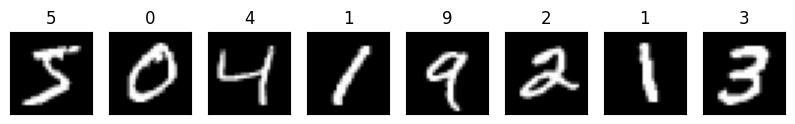

In [ ]:
# Display some images
fig, axes = plt.subplots(ncols=8, sharex=False,
    sharey=True, figsize=(10, 4))
for i in range(8):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

The images from above code show the digit written by hand (X) along with the label (y) above each images.

Now we will turn all the labels into one-hot representation. It can be done easily by using to_categorical() function from Keras module. Before using the function into our main program, I will explain a bit about how the function works. So in the example below I am going to find out the one-hot representation of class with label 3 in which the total number of classes are 10.

In [ ]:
to_categorical(8, num_classes=10)

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

You can see here that the output is a simple array which has all-zero values except the value of index 5. And that’s it. Such representation is called as one-hot encoding. Now what we want to do in our program is to one-hot-encode all the target labels (both y_train and y_test), which can be done by using the following code:

In [ ]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


Alright, so up to this point, we have already had a correct target label shape. Now we can start to create the Neural Network model using Keras.

The first thing to do is to initialize a sequential model. Afterwards, we are now able to add layers to it. Here I start the Neural Network model with a flatten layer because we need to reshape the 28 by 28 pixels image (2-dimensions) into 784 values (1-dimension). Next, we connect this 784 values into 5 neurons with sigmoid activation function. Actually, you can freely choose any number of neurons for this layer, but since I want to make the Neural Network model to be simple and fast to train so I just go with 5 neurons for this case. The last thing to add is another dense layer (here I use softmax activation function) which acts as our output layer. In the last layer we need to use 10 neurons because our classification task have 10 different classes.

In [ ]:
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model1 = Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(5, activation='sigmoid'))
model1.add(Dense(10, activation='sigmoid'))
model1.add(Dense(10, activation='softmax'))

In [ ]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(10, activation='sigmoid'))
model2.add(Dense(5, activation='relu'))
model2.add(Dense(10, activation='softmax'))

We can also use the code below in order to see the details of our architecture:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3985 (15.57 KB)
Trainable params: 3985 (15.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


After constructing the Neural Network classifier model, we need to compile it with the following code:

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

The code above shows that we pass categorical cross entropy for the loss function argument because it is just the best one to be used in multiclass classification problem. Next, we use Adam optimizer since it is also the best one for most cases. Lastly we have accuracy to be passed in metrics argument in order to measure the performance of our classifier.

Now into the fun part: training our Neural Network! So basically training a model is easy as what we need to do is just to run the fit() method on our model.

In [ ]:
model.fit(X_train, y_train, epochs=50,
          validation_data=(X_test,y_test))

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6878 - acc: 0.4658 - val_loss: 1.3542 - val_acc: 0.6031
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1960 - acc: 0.6656 - val_loss: 1.0467 - val_acc: 0.7316
Epoch 3/50
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0204 - acc: 0.7114 - val_loss: 0.9565 - val_acc: 0.7278
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9516 - acc: 0.7238 - val_loss: 0.8846 - val_acc: 0.7534
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9029 - acc: 0.7367 - val_loss: 0.9287 - val_acc: 0.7346
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8795 - acc: 0.7463 - val_loss: 0.8224 - val_acc: 0.7715
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8448 - acc: 0.7585 - val_loss: 0.8203 - val_acc: 0.7658
Epoch 8/50
1875/1875 [==============================] - 4s 2ms

In [ ]:
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
# model1.fit(X_train, y_train, epochs=50,
#           validation_data=(X_test,y_test))

In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
# model2.fit(X_train, y_train, epochs=50,
#           validation_data=(X_test,y_test))

According to the output above, we can see that the accuracy is increasing (both towards training and test data) in our 5-iteration training process. I think this result is pretty good because only with relatively simple Neural Network model we can obtain approximately 75% of accuracy, even though this result can still be improved.

Now we can try to perform predictions on several images stored in our X_test variable.

In [ ]:
predictions = model.predict(X_test)
print(predictions)

313/313 [==============================] - 1s 2ms/step
[[2.2420159e-03 2.4168574e-07 3.4952175e-04 ... 9.3572879e-01
  8.8189612e-04 2.7913198e-02]
 [2.9140078e-03 1.5595098e-03 9.3943983e-01 ... 3.6514134e-04
  9.0063307e-03 1.0272790e-03]
 [1.6821028e-03 9.2898798e-01 2.1531926e-02 ... 1.0520248e-04
  4.0709201e-02 4.6578124e-03]
 ...
 [9.4809220e-05 1.5907700e-06 5.5598817e-04 ... 2.1170136e-02
  6.6444338e-03 2.0602800e-02]
 [2.0171127e-03 4.7007459e-05 2.0673433e-03 ... 3.8221403e-04
  1.6728546e-01 3.4344438e-04]
 [6.6280244e-03 5.0948607e-04 8.7588150e-03 ... 2.5332471e-05
  1.0667424e-02 1.2479334e-04]]


So actually, this output shape is (10000, 10) in which it stores the classification probability value of each sample. Run the following code find out the actual prediction of the model:

In [ ]:
predictions = np.argmax(predictions, axis = 1)
print(predictions)

[7 2 1 ... 4 5 6]


Lastly, using the code below we can try to print some images along with its predictions:

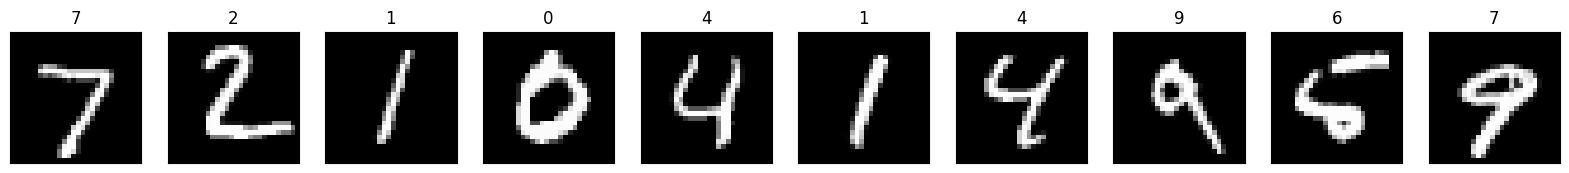

In [ ]:
fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()